In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#Pipeline With some Models to test
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

#import model algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve, classification_report,confusion_matrix, f1_score

from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.ensemble import VotingClassifier

import warnings
warnings.simplefilter("ignore")

randomState = 12
#num_class = len(y.unique())

In [2]:
df = pd.read_excel("Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.xlsx")
df.head()

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,0,>80,3,0,0,0,0,...,0,1,0.4999,0,0,0.0,0,1,0.01,0
1,1,1,2,1,>60,7,0,1,0,0,...,1,1,14.9000,1,1,0.6,1,1,1.20,1
2,1,1,2,1,>80,7,0,1,0,0,...,1,1,33.9000,1,1,1.2,1,0,0.00,0
3,1,1,15,0,>70,9,1,0,0,0,...,1,1,18.4000,1,1,7.3,1,1,0.05,0
4,1,1,9,0,>70,7,1,0,0,0,...,1,1,11.6000,1,0,0.0,0,1,0.01,0


In [6]:
df["Death"].value_counts()

0    3563
1    1148
Name: Death, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Derivation cohort      4711 non-null   int64  
 1   LOS_Y                  4711 non-null   int64  
 2   LOS                    4711 non-null   int64  
 3   Death                  4711 non-null   int64  
 4   Age                    4711 non-null   object 
 5   Severity               4711 non-null   int64  
 6   Black                  4711 non-null   int64  
 7   White                  4711 non-null   int64  
 8   Asian                  4711 non-null   int64  
 9   Latino                 4711 non-null   int64  
 10  MI                     4711 non-null   int64  
 11  PVD                    4711 non-null   int64  
 12  CHF                    4711 non-null   int64  
 13  CVD                    4711 non-null   int64  
 14  DEMENT                 4711 non-null   int64  
 15  COPD

In [5]:
#Describe the Age
df['Age.1'].describe()

count    4711.000000
mean       63.369561
std        16.701791
min        18.000000
25%        54.000000
50%        65.000000
75%        76.000000
max       103.000000
Name: Age.1, dtype: float64

<AxesSubplot: >

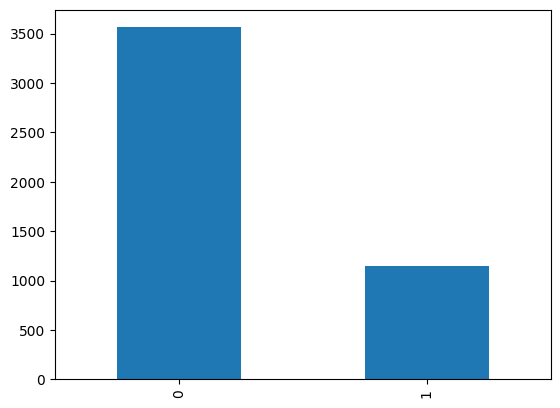

In [33]:
df["Death"].value_counts().plot.bar()

In [6]:
df.columns.sort_values() #displays the various columns in the dataset

Index(['ALT', 'ALT > 40', 'ALTYes', 'AST', 'AST > 40', 'ASTYes', 'Age',
       'Age.1', 'AgeScore', 'All CNS', 'Asian', 'BUN', 'BUN > 30', 'BUNYes',
       'Black', 'C-Reactive Prot > 10', 'CHF', 'COPD', 'CVD', 'CrctProtYes',
       'CrctProtein', 'Creatinine', 'CrtnScore', 'CrtnYes', 'D-Dimer > 3',
       'DDimerYes', 'DEMENT', 'DM Complicated', 'DM Simple', 'Ddimer', 'Death',
       'Derivation cohort', 'Ferritin', 'Ferritin > 300', 'FerritinYes',
       'Glucose', 'Glucose <60 or > 500', 'GlucoseYese', 'IL6', 'IL6 > 150',
       'IL6Yes', 'INR', 'INR > 1.2', 'INRYes', 'LOS', 'LOS_Y', 'Latino',
       'Lympho', 'LymphoYes', 'Lymphocytes < 1', 'MAP', 'MAP < 70', 'MI',
       'MapYes', 'O2 Sat < 94', 'O2SatsYes', 'OldOtherNeuro', 'OldSyncope',
       'OsSats', 'OtherBrnLsn', 'PVD', 'Plts', 'PltsScore', 'PltsYes',
       'ProCalCYes', 'Procalciton > 0.1', 'Procalcitonin', 'Pure CNS',
       'Renal Disease', 'Seizure', 'Severity', 'SodimuYes', 'Sodium',
       'Sodium < 139 or > 154', 'S

In [8]:
#show only column names with more than 2 unique values, discarding all boolean ones. 
cols = ((df.dtypes != 'object') & (df.nunique() > 2))
cols = cols.drop(['LOS', 'Severity', 'Age.1', 'AgeScore','CrtnScore']) #drop items that show categories, scores, etc.
normFeatures = list(cols[cols].index)
print(normFeatures)

['PVD', 'OsSats', 'Temp', 'MAP', 'Ddimer', 'Plts', 'PltsScore', 'INR', 'BUN', 'Creatinine', 'Sodium', 'Glucose', 'AST', 'ALT', 'WBC', 'Lympho', 'IL6', 'Ferritin', 'CrctProtein', 'Procalcitonin', 'Troponin']


In [9]:
#Apply StandardScaler() in a couple of columns
from sklearn.preprocessing import StandardScaler


normalizedData = df.copy()

for name in normFeatures:
    normalizedData[name] = (normalizedData[name] - normalizedData[name].mean()) / normalizedData[name].std()

normalizedData[normFeatures]

,PVD,OsSats,Temp,MAP,Ddimer,Plts,PltsScore,INR,BUN,Creatinine,...,Glucose,AST,ALT,WBC,Lympho,IL6,Ferritin,CrctProtein,Procalcitonin,Troponin
0,-0.458389,0.285030,0.139144,0.854182,-0.492014,-0.185817,-0.449512,-0.005001,-0.358682,-0.472912,...,-0.120675,-0.181950,-0.264676,-0.390357,0.018778,-0.055855,-0.341258,-0.874517,-0.253185,-0.154974
1,1.987216,-0.031302,0.067361,0.173643,-0.068789,0.239771,-0.449512,0.295730,5.727982,2.749458,...,1.047159,0.106565,-0.099523,0.506829,-0.207418,-0.055855,-0.055447,0.408530,-0.157378,4.282678
2,1.987216,0.495918,0.440633,-0.588559,-0.083972,-0.776429,1.345106,-0.105244,1.851738,0.573410,...,-0.051979,-0.152609,-0.227975,-0.322389,-0.166292,0.088926,-0.138123,2.101429,-0.061572,-0.192265
3,-0.458389,-0.189468,0.397563,0.854182,-0.038423,-0.029478,-0.449512,0.195486,-0.871244,2.408266,...,-0.975559,-0.093928,-0.237151,-0.648638,-0.166292,-0.055855,-0.077731,0.720380,0.912461,-0.005809
4,-0.458389,0.179586,0.289889,0.922236,-0.298431,-0.880655,1.345106,-0.105244,-0.871244,0.247382,...,-0.975559,-0.123269,-0.136223,-0.376764,0.018778,-0.038255,0.204851,0.114501,-0.253185,-0.154974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,-0.458389,-4.723560,-4.627252,-3.337934,0.010922,1.056206,-0.449512,-0.005001,-0.614963,-0.472912,...,-0.235168,-0.196620,-0.172924,0.248548,-0.063475,-0.055855,-0.245988,-0.758678,-0.237233,-0.154974
4707,1.987216,0.074142,0.153501,0.200865,-0.512890,-0.359526,-0.449512,-0.105244,-0.454788,-0.510823,...,-0.975559,-0.113489,-0.117873,-0.594264,-0.022349,-0.055855,0.034979,-0.642849,-0.237233,-0.154974
4708,1.987216,0.285030,0.096074,0.731685,-0.541358,0.995408,-0.449512,-0.105244,-0.646998,-0.435002,...,0.192274,-0.181950,-0.246326,-0.145670,-0.063475,-0.055855,-0.264073,-0.874517,-0.253185,-0.192265
4709,1.987216,0.285030,0.139144,0.160033,-0.446465,2.237430,-0.449512,-0.105244,-0.326647,-0.325062,...,0.024350,-0.157500,-0.090347,-0.118483,0.101031,-0.055855,0.041438,-0.152799,-0.237217,-0.154974


In [10]:
df = normalizedData

In [11]:
#Which columns do we have now?
df.columns

Index(['Derivation cohort', 'LOS_Y', 'LOS', 'Death', 'Age', 'Severity',
       'Black', 'White', 'Asian', 'Latino', 'MI', 'PVD', 'CHF', 'CVD',
       'DEMENT', 'COPD', 'DM Complicated', 'DM Simple', 'Renal Disease',
       'All CNS', 'Pure CNS', 'Stroke', 'Seizure', 'OldSyncope',
       'OldOtherNeuro', 'OtherBrnLsn', 'Age.1', 'AgeScore', 'O2SatsYes',
       'OsSats', 'O2 Sat < 94', 'TempYes', 'Temp', 'Temp > 38', 'MapYes',
       'MAP', 'MAP < 70', 'DDimerYes', 'Ddimer', 'D-Dimer > 3', 'PltsYes',
       'Plts', 'PltsScore', 'INRYes', 'INR', 'INR > 1.2', 'BUNYes', 'BUN',
       'BUN > 30', 'CrtnYes', 'Creatinine', 'CrtnScore', 'SodimuYes', 'Sodium',
       'Sodium < 139 or > 154', 'GlucoseYese', 'Glucose',
       'Glucose <60 or > 500', 'ASTYes', 'AST', 'AST > 40', 'ALTYes', 'ALT',
       'ALT > 40', 'WBCYes', 'WBC', 'WBC <1.8 or > 4.8', 'LymphoYes', 'Lympho',
       'Lymphocytes < 1', 'IL6Yes', 'IL6', 'IL6 > 150', 'FerritinYes',
       'Ferritin', 'Ferritin > 300', 'CrctProtYes', 'Crc

In [12]:
# Calculate the correlation between variables and Deaths
correlation_order = df.corr()[['Death']].sort_values(by=['Death'], ascending = False).drop(['Death'])
correlation_order.head(25)

,Death
Severity,0.431134
MAP < 70,0.392984
Age.1,0.291806
AgeScore,0.286053
CrtnScore,0.226512
CrctProtein,0.215827
Procalciton > 0.1,0.211338
BUN > 30,0.205231
C-Reactive Prot > 10,0.195811
BUN,0.195298


In [13]:
features = list(correlation_order.head(10).index)  #select the N features more correlatad
features.remove('AgeScore')
features.remove('Severity')
features.remove('CrtnScore')
features.remove('C-Reactive Prot > 10')
features.remove('BUN')

features

['MAP < 70', 'Age.1', 'CrctProtein', 'Procalciton > 0.1', 'BUN > 30']

<AxesSubplot: >

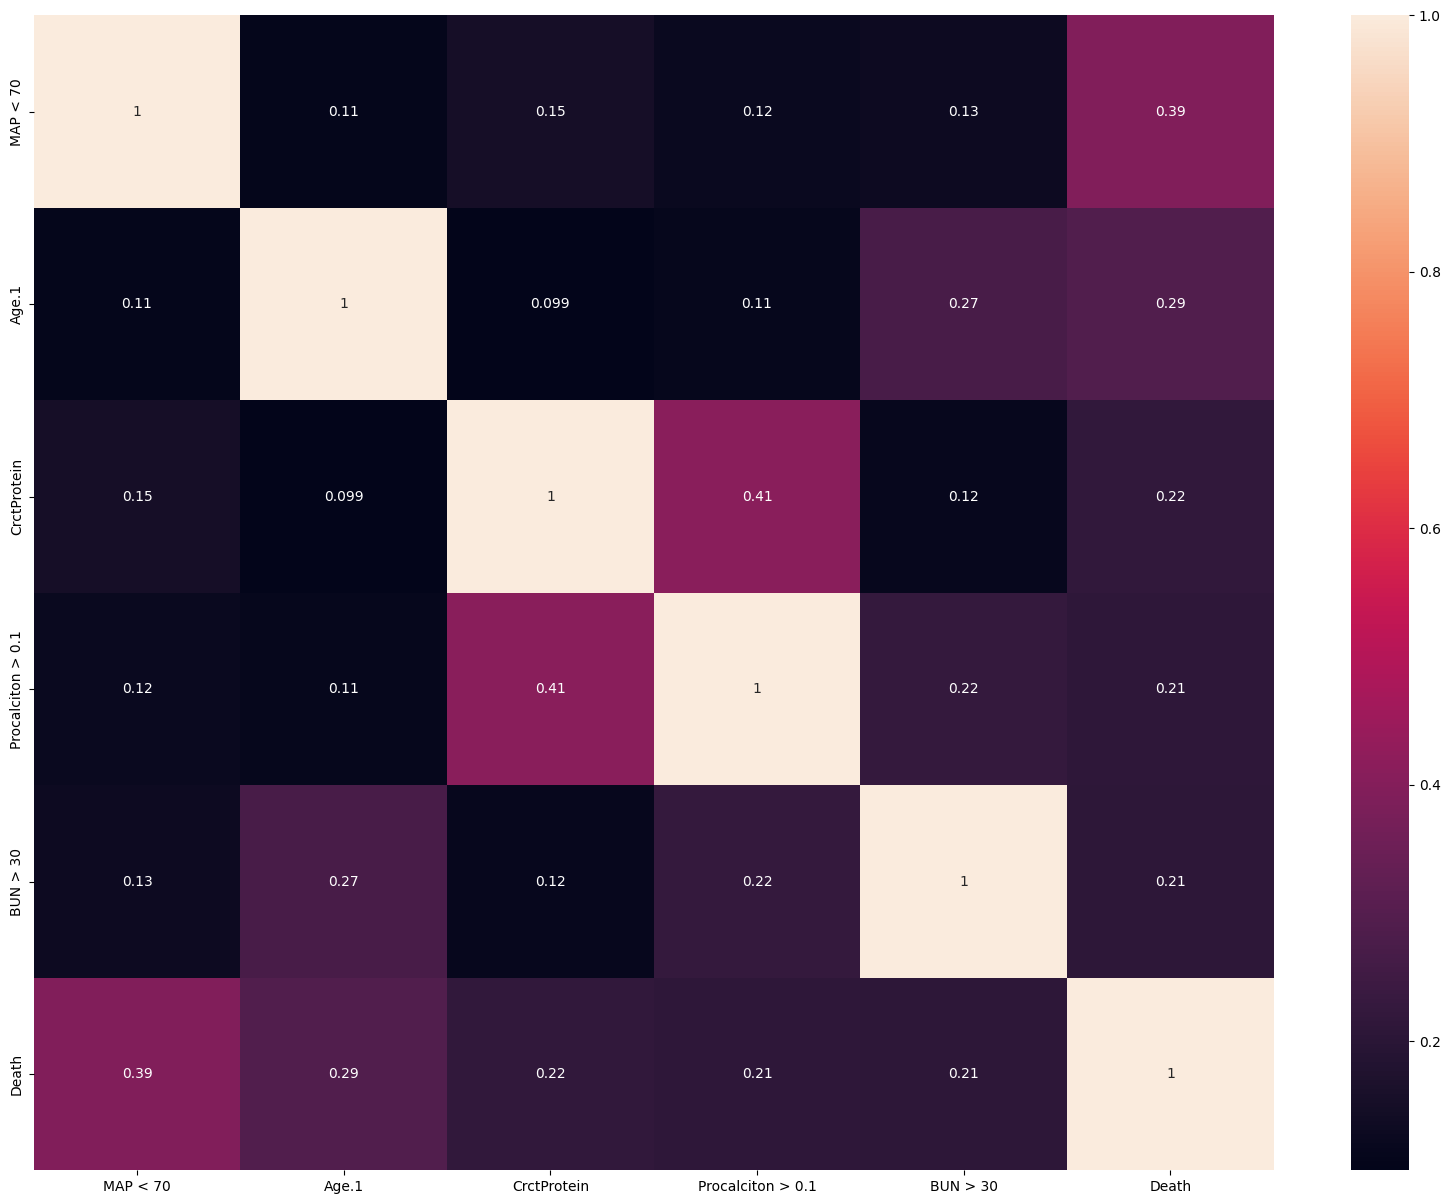

In [11]:
#Correlation heat Map

#Add the Sevetiry_class to see the correlation with each variable
featuresForCorrMap = features.copy()
featuresForCorrMap.append('Death') 

fig,ax=plt.subplots(1,1,figsize=(20,15))
sns.heatmap(df[featuresForCorrMap].corr(),annot=True,label='spearman Correlation Heat Map')

EDA

<AxesSubplot: title={'center': 'Age distribution'}, ylabel='Age.1'>

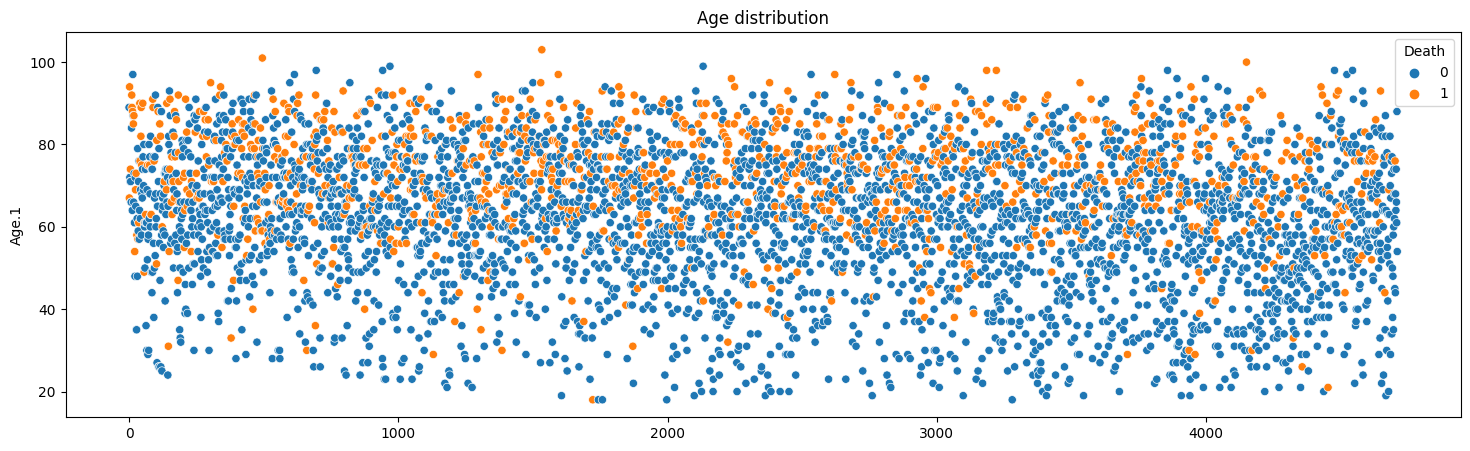

In [15]:
#Plot scatter with detailed info of age vs survived
plt.figure(figsize=(18,5))
plt.title('Age distribution')
sns.scatterplot(x=df.index, y=df['Age.1'], hue=df.Death)

<AxesSubplot: title={'center': 'Age distribution'}, xlabel='Age.1'>

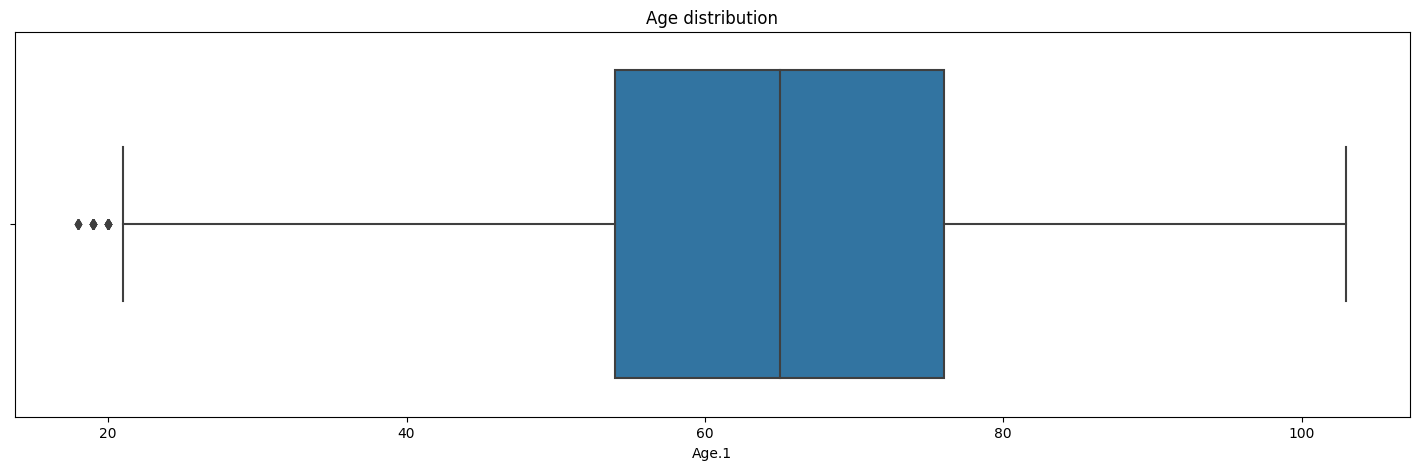

In [17]:
plt.figure(figsize=(18,5))
plt.title('Age distribution')
sns.boxplot(x=df['Age.1'])

In [19]:
df['Age.1'].describe()

count    4711.000000
mean       63.369561
std        16.701791
min        18.000000
25%        54.000000
50%        65.000000
75%        76.000000
max       103.000000
Name: Age.1, dtype: float64

<AxesSubplot: title={'center': '`%` of deaths by MAP Less than 70'}, xlabel='MAP < 70'>

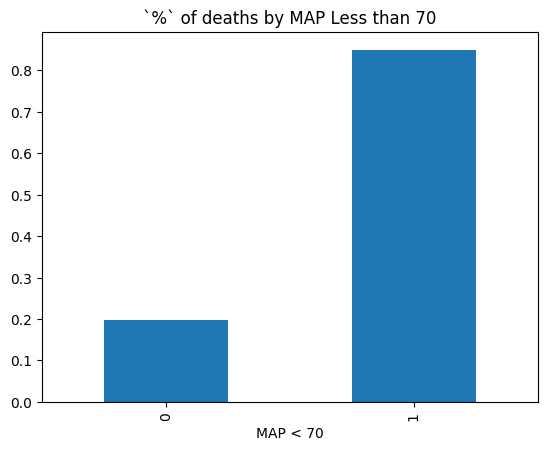

In [37]:
# Plot the percentage of deaths by Maps Less than 70
grouped = df.groupby('MAP < 70').sum()['Death'] / df.groupby('MAP < 70').count()['Death']
grouped.plot.bar(title = '`%` of deaths by MAP Less than 70')

<AxesSubplot: title={'center': 'CrctProtein'}, ylabel='CrctProtein'>

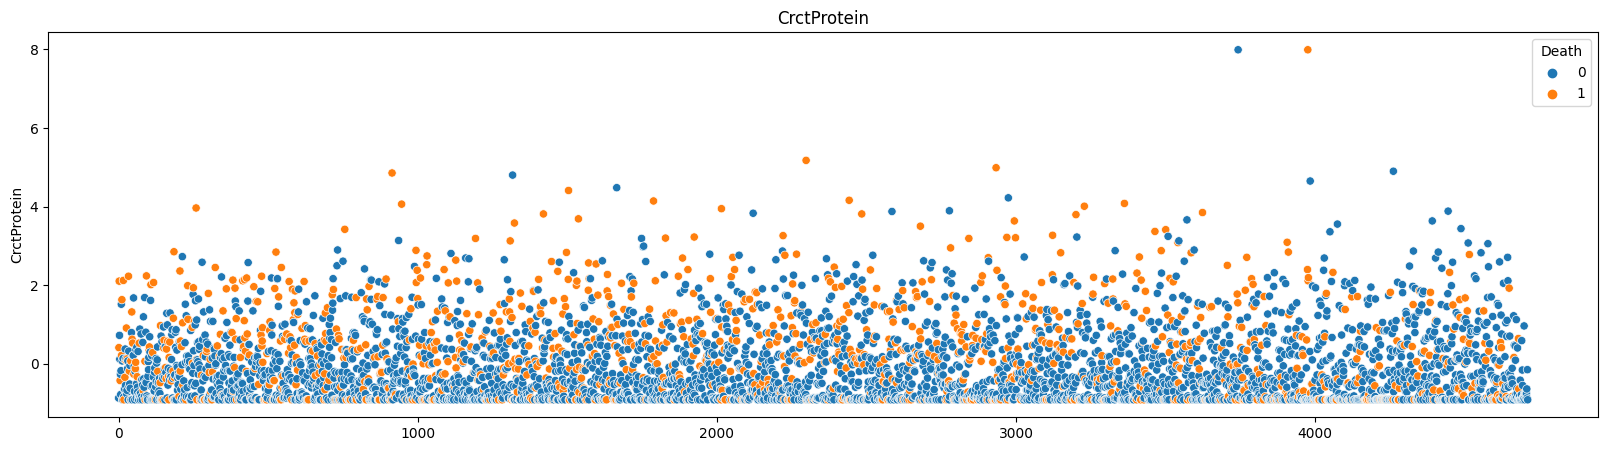

In [26]:
plt.figure(figsize=(20,5))
plt.title('CrctProtein')
sns.scatterplot(x=df.index, y=df['CrctProtein'], hue=df.Death)

In [25]:
df.CrctProtein.describe()

count    4.711000e+03
mean    -1.885329e-17
std      1.000000e+00
min     -9.190583e-01
25%     -8.388684e-01
50%     -3.399089e-01
75%      5.065402e-01
max      7.990941e+00
Name: CrctProtein, dtype: float64

<AxesSubplot: title={'center': '`%` of deaths by Procalciton > 0.1'}, xlabel='Procalciton > 0.1'>

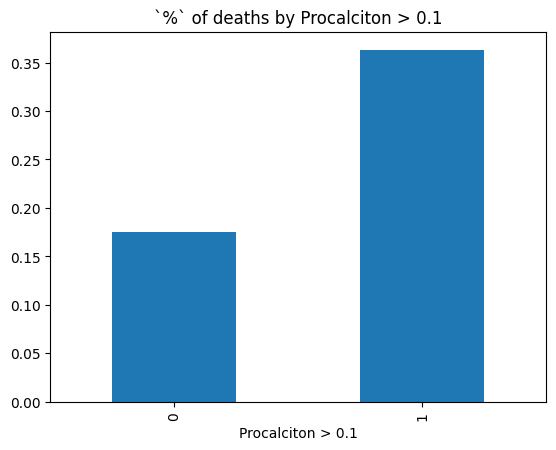

In [29]:
# Plot the percentage of deaths by Procalitonin < 1
grouped = df.groupby('Procalciton > 0.1').sum()['Death'] / df.groupby('Procalciton > 0.1').count()['Death']
grouped.plot.bar(title = '`%` of deaths by Procalciton > 0.1')

<AxesSubplot: title={'center': '`%` of deaths by BUN > 30'}, xlabel='BUN > 30'>

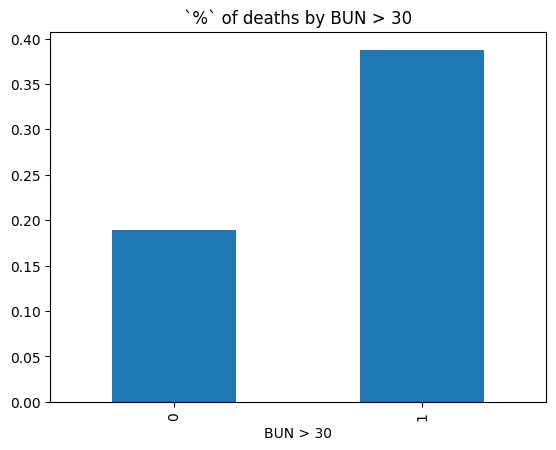

In [51]:
# Plot the percentage of deaths by Procalitonin < 1
grouped = df.groupby('BUN > 30').sum()['Death'] / df.groupby('BUN > 30').count()['Death']
grouped.plot.bar(title = '`%` of deaths by BUN > 30')

In [52]:
X = df[features]
y = df["Death"]

#Train the model

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)



In [13]:
#Pipeline With some Models to test


# Define the model to use:
model=[]
model.append(('randomForestClassifier', RandomForestClassifier(n_estimators = 100,random_state=randomState )))
model.append(('SVC', SVC(kernel='rbf')))
model.append(('NaiveBayes', GaussianNB()))
model.append(('LogisticRegression', LogisticRegression(n_jobs=50)))


scores=[]
accs=[]

# Apply CrossValidation for each (accuracy for classification)
for name, models in model:
    pipeline = Pipeline(steps=[('model', models)])

    score = cross_val_score(pipeline, X, y.values.ravel(), cv=5, scoring='f1', n_jobs=1, verbose=False)
    scores.append((name, np.mean(score)))

    acc = cross_val_score(pipeline, X, y.values.ravel(), cv=5, scoring='accuracy', n_jobs=1, verbose=False)
    accs.append((name, np.mean(acc)))

    
print(scores)
print(accs)

[('randomForestClassifier', 0.48499996188526256), ('SVC', 0.0), ('NaiveBayes', 0.45022955065800885), ('LogisticRegression', 0.4533865174856489)]
[('randomForestClassifier', 0.7764797265807053), ('SVC', 0.7563150535963958), ('NaiveBayes', 0.8040731459654669), ('LogisticRegression', 0.8087429331784317)]


In [22]:
voting_classifier_hard = VotingClassifier(
    estimators = [('rfc',RandomForestClassifier(class_weight= 'balanced_subsample', 
                                      criterion= 'entropy',
                                      max_depth= 170, max_features= 'log2', 
                                      n_estimators= 170, random_state=1)),
                  ('lr', LogisticRegression(C= 1, class_weight= 'dict', n_jobs= 50, penalty= 'l2', solver= 'sag', random_state=1, max_iter=100)),
                  ('gnb', GaussianNB())], 
    voting='hard')

voting_classifier_soft = VotingClassifier(
    estimators = [('rfc',RandomForestClassifier(class_weight= 'balanced_subsample', 
                                      criterion= 'entropy',
                                      max_depth= 170, max_features= 'log2', 
                                      n_estimators= 170, random_state=1)),
                  ('lr', LogisticRegression(C= 1, class_weight= 'dict', n_jobs= 50, penalty= 'l2', solver= 'sag', random_state=1, max_iter=100)),
                  ('gnb', GaussianNB())], 
    voting='soft')

voting_classifier_hard.fit(X_train, y_train)
y_pred_vch = voting_classifier_hard.predict(X_test)

# make predictions with the soft voting model
voting_classifier_soft.fit(X_train, y_train)
y_pred_vcs = voting_classifier_soft.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
print ("VCH")

print(confusion_matrix(y_test, y_pred_vch))
print(classification_report(y_test, y_pred_vch))

print("VCS")

print(confusion_matrix(y_test, y_pred_vcs))
print(classification_report(y_test, y_pred_vcs))



VCH
[[705  12]
 [152  74]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.90       717
           1       0.86      0.33      0.47       226

    accuracy                           0.83       943
   macro avg       0.84      0.66      0.69       943
weighted avg       0.83      0.83      0.79       943

VCS
[[701  16]
 [148  78]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       717
           1       0.83      0.35      0.49       226

    accuracy                           0.83       943
   macro avg       0.83      0.66      0.69       943
weighted avg       0.83      0.83      0.80       943



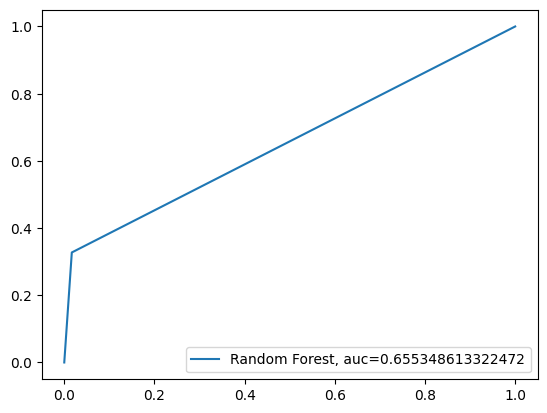

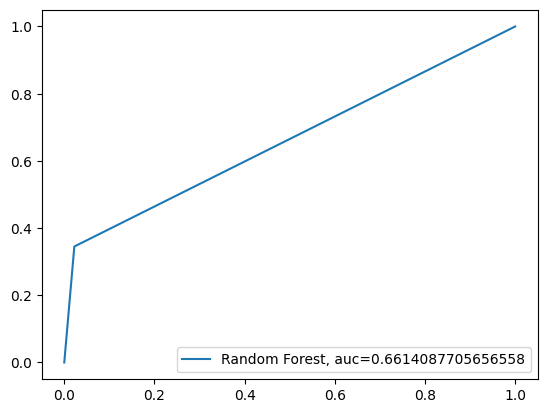

In [24]:
# Plot the AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred_vch)
auc = roc_auc_score(y_test, y_pred_vch)
plt.plot(fpr,tpr,label="Random Forest, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = roc_curve(y_test,  y_pred_vcs)
auc = roc_auc_score(y_test, y_pred_vcs)
plt.plot(fpr,tpr,label="Random Forest, auc=" + str(auc))
plt.legend(loc=4)
plt.show()



We will use random forest for the classification. Then we use grid search cv to look for the best parameters

In [ ]:
#Getting the best hyper-parameters for the RandomForest Classifier Using GridSearchCV

model = RandomForestClassifier()
space = dict()
space['n_estimators'] = list(range(50,201,40))
space['max_depth'] = list(range(50,201,40))
space['criterion'] = ["gini", "entropy", "log_loss"]
space['max_features'] = ["sqrt", "log2", "None"]
space['class_weight'] = ["balanced", "balanced_subsample"]
space['random_state'] = list(range(1,15,3))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y.values.ravel())
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [28]:
#Random Forest Training
randomForest = RandomForestClassifier(class_weight= 'balanced_subsample', 
                                      criterion= 'entropy',
                                      max_depth= 170, max_features= 'log2', 
                                      n_estimators= 170, random_state=1)
randomForest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=170, max_features='log2', n_estimators=170,
                       random_state=1)

[[638  79]
 [114 112]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       717
           1       0.59      0.50      0.54       226

    accuracy                           0.80       943
   macro avg       0.72      0.69      0.70       943
weighted avg       0.79      0.80      0.79       943



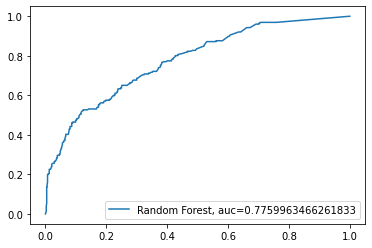

In [30]:
# Proccess the predictions for the training of the model
predictions_RandomForest = randomForest.predict(X_test)

# Create the probability to calculate the AUC
randomForest_pred_probability = randomForest.predict_proba(X_test)[::,1]

print(confusion_matrix(y_test, predictions_RandomForest))
print(classification_report(y_test, predictions_RandomForest))

# Plot the AUC Curve
fpr, tpr, _ = roc_curve(y_test,  randomForest_pred_probability)
auc = roc_auc_score(y_test, randomForest_pred_probability)
plt.plot(fpr,tpr,label="Random Forest, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Prediction Code with User Input


# Prompt user to input parameters for prediction
age = float(input("Enter patient's age: "))
crct_protein = float(input("Enter patient's C-Reactive Protein level: "))
procalcitonin = float(input("Enter patient's Procalcitonin level: "))
bun = float(input("Enter patient's Blood Urea Nitrogen (BUN) level: "))

# Create a DataFrame with user input
new_data = pd.DataFrame({'Age.1': [age],
                         'CrctProtein': [crct_protein],
                         'Procalciton': [procalcitonin],
                         'BUN': [bun]})

# Preprocess new data
new_data_normalized = new_data.copy()
for name in normFeatures:
    new_data_normalized[name] = (new_data_normalized[name] - df[name].mean()) / df[name].std()

# Use the trained Random Forest model to make predictions
prediction = randomForest.predict(new_data_normalized[features])

# Display prediction
if prediction[0] == 1:
    print("Based on the provided parameters, the model predicts that the patient is at risk of mortality.")
else:
    print("Based on the provided parameters, the model predicts that the patient is not at risk of mortality.")
